## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [2]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### **Dataset Preparation**

In [3]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")

--2024-12-08 22:18:12--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 172.217.164.14, 2607:f8b0:4025:803::200e
Connecting to docs.google.com (docs.google.com)|172.217.164.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download [following]
--2024-12-08 22:18:12--  https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.12.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [application/octet-stream]
Saving to: ‘Linear_regression_dataset’

Linear_regression_d 100%[===================>]   2.40M  --.-KB/s    in 

In [4]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [35]:
data_df['date']=data_df['date'].astype(str)
data_df['date'] = data_df['date'].str.replace("T000000", "", regex=False)
data_df['date']=data_df['date'].astype(int)                      # Remove T000000 part from data column. Hint: search about .str.replace() method. :)

data_array =data_df.drop(columns=['id']).to_numpy()                                    # Create a numpy array which does not have "id" field
assert (data_array.shape == (21613,20))

data_df.head()
data_array

array([[ 2.0141013e+07,  2.2190000e+05,  3.0000000e+00, ...,
        -1.2225700e+02,  1.3400000e+03,  5.6500000e+03],
       [ 2.0141209e+07,  5.3800000e+05,  3.0000000e+00, ...,
        -1.2231900e+02,  1.6900000e+03,  7.6390000e+03],
       [ 2.0150225e+07,  1.8000000e+05,  2.0000000e+00, ...,
        -1.2223300e+02,  2.7200000e+03,  8.0620000e+03],
       ...,
       [ 2.0140623e+07,  4.0210100e+05,  2.0000000e+00, ...,
        -1.2229900e+02,  1.0200000e+03,  2.0070000e+03],
       [ 2.0150116e+07,  4.0000000e+05,  3.0000000e+00, ...,
        -1.2206900e+02,  1.4100000e+03,  1.2870000e+03],
       [ 2.0141015e+07,  3.2500000e+05,  2.0000000e+00, ...,
        -1.2229900e+02,  1.0200000e+03,  1.3570000e+03]])

Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [36]:
mean = np.mean(data_array, axis=0)                          # this should be an array, each entry should be mean of a column
sd = np.std(data_array, axis=0)                               # this should be an array, each entry should be standard deviation of a column

data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)

(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [93]:
labels = data_df['price']                                                                                                         # extract the price column from data

price_column_index = np.where(data_df.columns == 'price')[0][0]

x_array_norm =  np.delete(data_array, price_column_index, axis=1)                                                                                                  # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [94]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  mse = np.mean((y_pred - y_true) ** 2)                    # fill code here

  return mse

In [95]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.dot(x, a) + b                   # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [96]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)

  da = (2 / m) * np.dot(x.T, (yp - y_true))             # write code to calculate derivative of loss with respect to a
  db = (2 / m) * np.sum(yp - y_true)              # write code to calculate derivative of loss with respect to b

  assert(da.shape ==(n,))
  return (da,db)

In [97]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.zeros(n)                                       # initialize a- weights and b- bias
  b = 0

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b
        da, db = gradient(x, a, b, y_true)

        # Update weights and bias using gradient descent
        a = a - learning_rate * da
        b = b - learning_rate * db

        # Calculate loss (MSE) at this point
        yp = y(x, a, b)  # predicted values
        l_mse = np.mean((yp - y_true) ** 2)  # MSE loss
        loss_mse.append(l_mse)

        print("Epoch ",i+1," Completed!","loss = ",l_mse)

  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training**

In [98]:
epochs = 1000              # tweak this!!!
learn_rate = 0.01          # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train, y_train, learning_rate=learn_rate, epochs=epochs)

Epoch  1  Completed! loss =  392539049660.4459
Epoch  2  Completed! loss =  367307836658.37164
Epoch  3  Completed! loss =  345019724583.48413
Epoch  4  Completed! loss =  325175551835.2422
Epoch  5  Completed! loss =  307372630808.0359
Epoch  6  Completed! loss =  291285389603.0037
Epoch  7  Completed! loss =  276649943271.8077
Epoch  8  Completed! loss =  263251793646.7906
Epoch  9  Completed! loss =  250916020336.79553
Epoch  10  Completed! loss =  239499455582.95212
Epoch  11  Completed! loss =  228884439202.06406
Epoch  12  Completed! loss =  218973832229.32516
Epoch  13  Completed! loss =  209687033428.98654
Epoch  14  Completed! loss =  200956795009.926
Epoch  15  Completed! loss =  192726675398.62582
Epoch  16  Completed! loss =  184948999961.48697
Epoch  17  Completed! loss =  177583226863.4518
Epoch  18  Completed! loss =  170594636178.42358
Epoch  19  Completed! loss =  163953277025.1996
Epoch  20  Completed! loss =  157633120762.80298
Epoch  21  Completed! loss =  151611378

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Loss on test data =  5574472.410012945


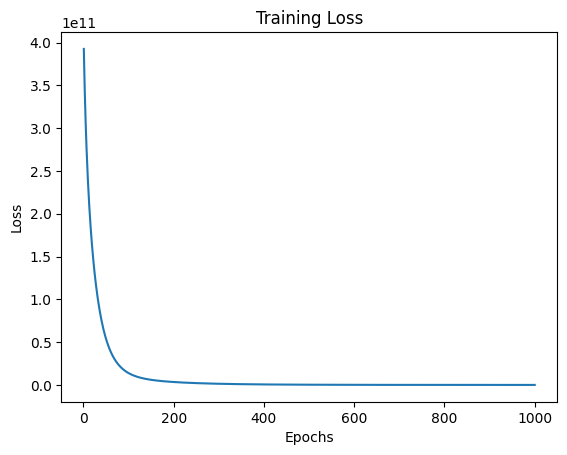

In [99]:
test_loss = loss(y(x_test, a, b), y_test)

print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot(range(1, epochs+1), train_loss)                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [100]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [101]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 6       9       9       3       5       

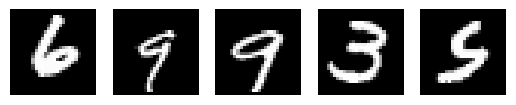

In [102]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [103]:
# Flatten the images into 1-D vectors
x_train_flatten = x_train.reshape(x_train.shape[0], -1)  # Reshape to (num_samples, num_features)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)    # Reshape to (num_samples, num_features)

# Divide the training data into training and validation data
n_validation = 10000  # Number of images to be used for validation

# Select the validation set
x_validation = x_train_flatten[:n_validation]  # Take the first 'n_validation' samples
y_validation = y_train[:n_validation]          # Corresponding labels for validation

# Update the training set by removing the validation samples
x_train_flatten = x_train_flatten[n_validation:]  # Remaining samples for training
y_train = y_train[n_validation:]                  # Remaining labels for training


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [104]:
model = keras.models.Sequential([
    layers.InputLayer(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

<bound method Model.summary of <Sequential name=sequential_3, built=True>>

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [105]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

n_epochs = 20  # Set the number of epochs
batch_size = 512  # Batch size

history = model.fit(x_train_flatten, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_validation, y_validation))

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6694 - loss: 15.1192 - val_accuracy: 0.8755 - val_loss: 1.6324
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8977 - loss: 1.1747 - val_accuracy: 0.9070 - val_loss: 0.9745
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9251 - loss: 0.6395 - val_accuracy: 0.9186 - val_loss: 0.8029
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9419 - loss: 0.4300 - val_accuracy: 0.9189 - val_loss: 0.6910
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9514 - loss: 0.3157 - val_accuracy: 0.9260 - val_loss: 0.6159
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9595 - loss: 0.2328 - val_accuracy: 0.9298 - val_loss: 0.5822
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9654 - loss: 0.1795 - val_accuracy: 0.9323 - val_loss: 0.5361
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9724 - loss: 0.1316 - val_accuracy: 0.9366 - val_l

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9401 - loss: 0.5693
Loss =  0.45906221866607666
Accuracy =  94.9999988079071 %


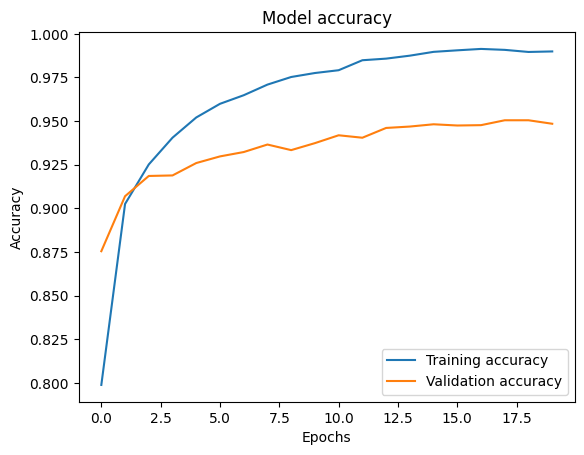

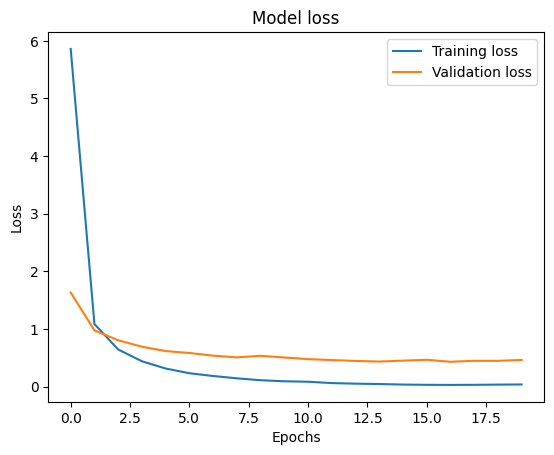

In [106]:
results = model.evaluate(x_test_flatten, y_test)
print("Loss = ", results[0])
print("Accuracy = ", results[1] * 100, "%")

# Plot Accuracy
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Lets show our results on images from testing dataset

Label: 

True Labels:
1   6   7   1   4   

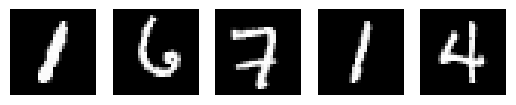


Predicted Labels:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4   

In [116]:
n = 5  # Set the number of images to see predictions on

index = np.random.choice(x_test_flatten.shape[0], size=n, replace=False)  # choose random indices from test data
print("Label: ")

# Show images and true labels
for i, ind in enumerate(index):
    plt.subplot(1, n, i + 1)
    plt.imshow(x_test[ind].reshape(28, 28), cmap='gray')  # Reshape and show images
    plt.axis("off")

print("\nTrue Labels:")
# Print true labels for each image
for i, ind in enumerate(index):
    print(y_test[ind], end="   ")

plt.show()

print("\nPredicted Labels:")

# Predict the labels for the images
for i, ind in enumerate(index):
    y_pred = model.predict(x_test_flatten[ind].reshape(1, -1))  # Predict for a single image
    digit = np.argmax(y_pred)  # Get the digit with the highest probability
    print(digit, end="   ")